In [1]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy import fft
import sympy as sp
import numpy as np
import math
%run 'shared.ipynb' # holds notes + SP specific functions

In [2]:
# a.1
n = 5

wp = 3
cn = sp.cosh(n*sp.acosh(wp))
e = sp.sqrt((10**(-60/-10)-1)/(cn**2))
rippledB = 10*sp.log(1+e**2, 10)
display(cn,e.evalf(), rippledB.evalf())

## c)
n = (1/(2*sp.log(3, 10)))*sp.log((10**(60/10)-1)/(10**(rippledB/10)-1), 10)
display(n.evalf())

cosh(5*acosh(3))

0.297353404698149

0.367961333086037

7.39167838872909

In [3]:
# a.2
f1 = 4*10**3
f2 = 5*10**3
Q = 5
c1 = 1.2*10**(-9)
c2 = 10*c1

w0 = 2*sp.pi*sp.sqrt(f1*f2)

## b)
r2 = ((1/c1+1/c2)*Q)/w0
r1 = 1/(w0**2*r2*c1*c2)
display(r2.evalf(), r1.evalf())

## c)
s = sp.symbols("s")
expTop = (1/(r1*c2))*s
expBut = s**2+(1/r2)*(1/c1+1/c2)*s+1/(r1*r2*c1*c2)
exp = expTop/expBut
A0 = exp.subs({s: 1j*w0})
A0dB = 20*sp.log(A0, 10)
display(A0.evalf(), A0dB.evalf())

## d) (taken from 2013)
C1 = c1
C2 = c2
w_0, q, r1, r2, c1, c2 = sp.symbols("w_0 Q r_1 r_2 c_1 c_2")

S = lambda x, y: (x/y)*sp.diff(y,x)

exp1 = 1/(r1*r2*c1*c2)
exp2 = (1/c1+1/c2)
fexp = 0.5*S(c1, exp1) - S(c1, exp2)
fexp.subs({c1: C1, c2: C2})

163112.249533103

539.214048043316

27.5000000000000

28.7866538766053

0.409090909090909

array([1., 0., 0.])

array([ 1.  ,  1.4 , 12.98,  8.4 , 36.  ])

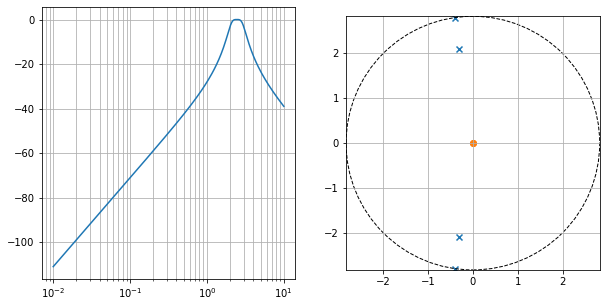

In [4]:
# a.3
poles = [
    -0.4+2.8j,
    -0.4-2.8j,
    -0.3-2.10j,
    -0.3+2.10j,
]
zeros = [
    0+0j,
    0-0j,
]

b, a = signal.zpk2tf(zeros, poles, 1)
display(b,a)
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
plotFilter(ax[0], b, a, "")
simplezplane(ax[1], b, a, "")

array([1., 2., 1.])

array([1.  , 1.8 , 0.81])

z**2 + 2*z + 1

z**2 + 1.8*z + 0.81

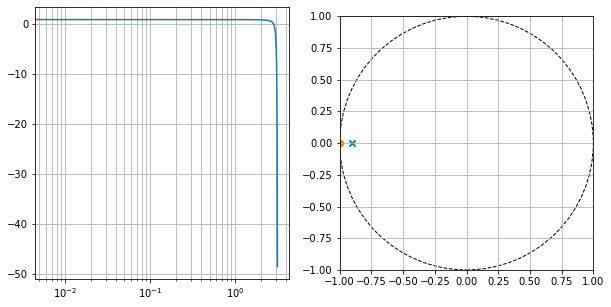

In [5]:
# b.1
poles = [
    -0.9,
    -0.9,
]
zeros = [
    -1,
    -1,
]

b, a = signal.zpk2tf(zeros, poles, 1)
display(b,a)
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
plotFilterDigital(ax[0], b, a, "")
simplezplane(ax[1], b, a, "")

## 3) (even though we have b and a above)
z = sp.symbols("z")
expZ = (z--1)**2
expP = (z--0.9)**2
display(expZ.expand())
display(expP.expand())

In [6]:
# b.2
fs = 4*10**3
h = np.array([0, -0.38, 0.44, 0.44, -0.38, 0])

z = sp.symbols("z")
h_z = np.array([hVal*z**(-1*i) for i, hVal in enumerate(h)]).sum()

## 4) calculate at 400 hz
w = 2*sp.pi*(400/fs)
display(w)
hzamp = h_z.subs({z: sp.exp(1j*w)})
display(abs(hzamp.evalf()))
display((20*sp.log(abs(hzamp), 10)).evalf())

0.2*pi

0.390212942597456

-8.1739666001402 + 5.75998523583693e-27*I

In [7]:
# b.3
fs = 4*10**3

s = sp.symbols("s")
exp = 1600/(1600+s)

## 1)
display("1.")
Omega = 1600
analogAmp = exp.subs({s: 1j*w})
analogAmpdb = (20*sp.log(abs(analogAmp), 10)).evalf()
display(w, abs(analogAmp.evalf()), analogAmpdb)

## 2) impulse response at time t=100 ms
display("2.")
t = 100*10**(-3)
wc = 2*sp.pi*(t*fs)
display(t*fs, wc, exp.subs({s: 1j*wc}).evalf())

## 3)
display("3.")
wc = Omega/fs
Td = 1/fs
OmegaPre = (2/Td)*sp.tan(wc/2)

z = sp.symbols("z")
Hz = exp.subs({s: (2/Td)*((z-1)/(z+1))})

display(wc, OmegaPre, Hz.simplify())

## 4) verify
display("4.")
verCut = Hz.subs({z: sp.exp(1j*wc)})
verCutdB = (20*sp.log(abs(verCut), 10)).evalf()
display(abs(verCut.evalf()), verCutdB)

'1.'

0.2*pi

0.999999922893725

-6.69736624915530e-7

'2.'

400.0

800.0*pi

0.288400439142001 - 0.45301835045029*I

'3.'

0.4

1621.68028406938

1600*(z + 1)/(9600.0*z - 6400.0)

'4.'

0.702332406271375

-3.06914584739 - 1.26734509812517e-34*I

array([ 1. +0.j,  0.5+0.j, -1. +0.j, -0.5+0.j])

[1, sqrt(2)/2, 0, -sqrt(2)/2]

[1.00000000000000,
 1.20710678118655,
 -0.646446609406726,
 -1.91421356237310,
 -0.707106781186548,
 0.707106781186548,
 0.353553390593274]

(0.0, 3.0)

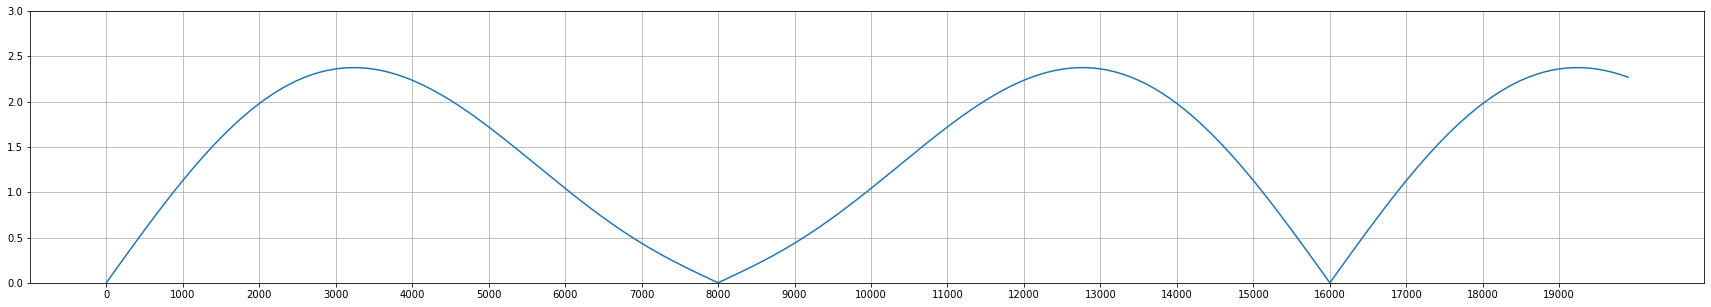

In [8]:
# c.1
fs = 16*10**3
N = 4
Hk = [0+0j, 2-1j, 0+0j, 2+1j]
hn = fft.ifft(Hk, N)
display(hn)

# c.3
f = 2*10**3
L = 4
n = sp.symbols("n")
exp = sp.cos(2*sp.pi*f*n*(1/fs))

xn = [exp.subs({n: nVal}) for nVal in range(L)]
display(xn)

# c.4
yn = np.convolve(xn, hn)
display([yval.evalf() for yval in yn])

# c.6
x = np.arange(0, 20*10**3, 100)
y = np.empty(len(x))
for i, xval in enumerate(x):
    f = xval
    HGain = np.array([v*sp.exp(-1j*i*2*sp.pi*f*(1/fs)) for i, v in enumerate(hn)]).sum()
    y[i] = abs(HGain.evalf())

fix, ax = plt.subplots(figsize=(30,5))
ax.plot(x,y)
ax.grid()
ax.set_xticks(ticks=np.arange(0, 20*10**3, 1000))
ax.set_ylim(0, 3)

In [9]:
# c.7
fs = 16*10**3
L = 128
deltaf = fs/L
pos117 = 117*deltaf
display(deltaf, pos117)

125.0

14625.0